# Result analyze of the implementations

In [132]:
# Tag: rkdp-opti-v0.1
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Vector multiplication executed by 3 aside threads
"""

v0_1 = {
    1: 0.67904,
    40: 26.071,
    100: 65.8627,
}

v0_1_base = {
    1: 1.07725,
    40: 41.6737,
    100: 104.387,
}

v0_1_speedup = {}
for key in v0_1:
    v0_1_speedup[key] = v0_1_base[key] / v0_1[key] * 100

print(v0_1_speedup)

{1: 158.64308435438267, 40: 159.84695638832417, 100: 158.4918322510313}


In [133]:
# Tag: rkdp-opti-v0.2
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Each worker thread pre-compute each coefficient
"""

v0_2 = {
    1: 0.693248,
    40: 26.3782,
    100: 66.4351,
}

v0_2_base = {
    1: 1.07725,
    40: 41.6768,
    100: 104.389,
}

v0_2_speedup = {}
for k, v in v0_2.items():
    v0_2_speedup[k] = v0_2_base[k] / v * 100

print(v0_2_speedup)

{1: 155.39172128877402, 40: 157.9971339970127, 100: 157.12928858389614}


In [134]:
# Tag: rkdp-opti-v0.3
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Use shared memory for all shared variables except the input
"""

v0_3 = {
    1: 0.677952,
    40: 26.0813,
    100: 65.8852,
}

v0_3_base = {
    1: 1.07315,
    40: 41.5314,
    100: 104.065,
}

v0_3_speedup = {}
for key in v0_3:
    v0_3_speedup[key] = v0_3_base[key] / v0_3[key] * 100

print(v0_3_speedup)

{1: 158.29291749268387, 40: 159.2382281558051, 100: 157.9489779191685}


In [135]:
# Tag: rkdp-opti-v0.4
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Use shared memory for coefficient and pre-compute them cooperatively
"""

v0_4 = {
    1: 0.708608,
    40: 26.5051,
    100: 66.4965,
}

v0_4_base = {
    1: 1.07213,
    40: 41.5304,
    100: 104.02,
}

v0_4_speedup = {}
for k, v in v0_4.items():
    v0_4_speedup[k] = v0_4_base[k] / v * 100

print(v0_4_speedup)

{1: 151.3008602781792, 40: 156.68833545242236, 100: 156.42928575188168}


In [136]:
# Tag: rkdp-opti-v0.5
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Improvement of coefficient pre-computation
"""

v0_5 = {
    1: 0.712704,
    40: 26.5257,
    100: 66.646,
}

v0_5_base = {
    1: 1.07315,
    40: 41.5283,
    100: 104.018,
}

v0_5_speedup = {}
for k, v in v0_5.items():
    v0_5_speedup[k] = v0_5_base[k] / v * 100

print(v0_5_speedup)

{1: 150.57443202227012, 40: 156.5587336055222, 100: 156.07538336884434}


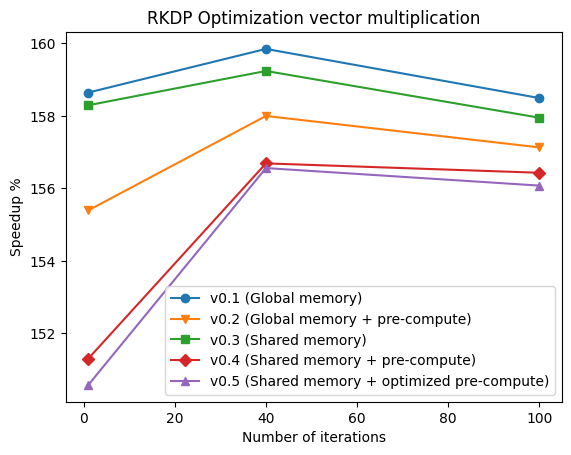

In [137]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.title('RKDP Optimization vector multiplication')
plt.xlabel('Number of iterations')
plt.ylabel('Speedup %')

plt.plot(v0_1_speedup.keys(), v0_1_speedup.values(), label='v0.1 (Global memory)', marker='o')

plt.plot(v0_2_speedup.keys(), v0_2_speedup.values(), label='v0.2 (Global memory + pre-compute)', marker='v')

plt.plot(v0_3_speedup.keys(), v0_3_speedup.values(), label='v0.3 (Shared memory)', marker='s')

plt.plot(v0_4_speedup.keys(), v0_4_speedup.values(), label='v0.4 (Shared memory + pre-compute)', marker='D')

plt.plot(v0_5_speedup.keys(), v0_5_speedup.values(), label='v0.5 (Shared memory + optimized pre-compute)', marker='^')

plt.legend()
plt.show()

In [138]:
import re

line = "info: With states=1 (time in ms):       One_thread=41.2037"
match = re.search(r'info: With states=(\d+) \(time in ms\): +(\w+)=(\d+\.\d+)', line)
print(match.group(1))
print(match.group(2))
print(match.group(3))


1
One_thread
41.2037


In [139]:
# Read data from output.txt and fill data
import re

data = {
    'One thread': {},
    'Global memory': {},
    'Shared memory': {},
}

end_point = {
    'One thread': 0,
    'Global memory': 0,
    'Shared memory': 0,
}


In [140]:

with open('output.txt', 'r') as f:
    for line in f:
        # Example: info: With states=x (time in ms):       One_thread=y
        # x is the number of states
        # y is the time in ms
        if line.startswith('info: With states'):
            match = re.search(r'info: With states=(\d+) \(time in ms\): +(\w+)=(\d+\.\d+)', line)
            if match:
                data[match.group(2).replace('_', ' ')][int(match.group(1))] = float(match.group(3))
                end_point[match.group(2).replace('_', ' ')] = int(match.group(1))


print(data)


{'One thread': {1: 41.2006, 2: 41.2785, 3: 41.6061, 4: 41.6031, 5: 41.6051, 6: 41.6031, 7: 41.6051, 8: 41.6051, 9: 41.6061, 10: 41.6051, 11: 41.6061, 12: 41.6041, 13: 41.6041, 14: 41.6041, 15: 41.6051, 16: 41.7137, 17: 41.6174, 18: 41.6041, 19: 41.6113, 20: 41.6051, 21: 41.6051, 22: 41.605, 23: 41.6051, 24: 41.6051, 25: 41.6052, 26: 41.6041, 27: 41.6051, 28: 41.6051, 29: 41.6051, 30: 41.6051, 31: 41.606, 32: 41.6051, 33: 41.6625, 34: 41.7403, 35: 41.6768, 36: 41.7516, 37: 41.686, 38: 41.7668, 39: 41.6891, 40: 41.7669, 41: 41.687, 42: 41.7792, 43: 41.684, 44: 41.7761, 45: 41.687, 46: 41.7772, 47: 41.6921, 48: 41.7669, 49: 41.6881, 50: 41.7638, 51: 41.6829, 52: 41.769, 53: 41.6828, 54: 41.777, 55: 41.6891, 56: 41.7853, 57: 41.6891, 58: 41.7597, 59: 41.691, 60: 41.7617, 61: 41.685, 62: 41.769, 63: 41.6901, 64: 41.7761, 65: 41.9574, 66: 41.9328, 67: 41.9635, 68: 41.9994, 69: 41.9809, 70: 41.9604, 71: 41.9942, 72: 42.0106, 73: 41.9809, 74: 41.9697, 75: 41.9717, 76: 42.0167, 77: 41.983, 78: 

In [141]:
global_speedup = {}
for i in range(1, len(data['Global memory'].keys()) + 1):
    global_speedup[i] = data['One thread'][i] / data['Global memory'][i] * 100

print(global_speedup)

shared_speedup = {}
for i in range(1, len(data['Shared memory'].keys()) + 1):
    shared_speedup[i] = data['One thread'][i] / data['Shared memory'][i] * 100

{1: 164.512857371027, 2: 164.2199863940707, 3: 160.99126673038305, 4: 160.8396285499996, 5: 160.53641916477275, 6: 160.395020414143, 7: 160.2192732482016, 8: 160.03007888977356, 9: 160.83195138639238, 10: 161.20446822607704, 11: 161.0105802496846, 12: 160.72853848026057, 13: 160.4496002653328, 14: 160.34818334932802, 15: 160.0928886682751, 16: 160.40954450191313, 17: 157.38650974934578, 18: 159.1855553344863, 19: 158.64131636535544, 20: 158.30866405387926, 21: 158.395452780337, 22: 158.45660486586127, 23: 158.23520910349444, 24: 158.395452780337, 25: 155.20100868047138, 26: 155.37484221297703, 27: 154.38114109300324, 28: 154.81601107394164, 29: 154.1643353404354, 30: 154.92842886081982, 31: 154.81359930641602, 32: 154.7221664398182, 33: 150.7391782566537, 34: 150.84765363835132, 35: 151.3241883128672, 36: 152.58303122441822, 37: 150.27288916446167, 38: 151.96658443760415, 39: 150.01853231279668, 40: 152.43282895745284, 41: 148.02570840139197, 42: 148.36890514577934, 43: 148.89748563141

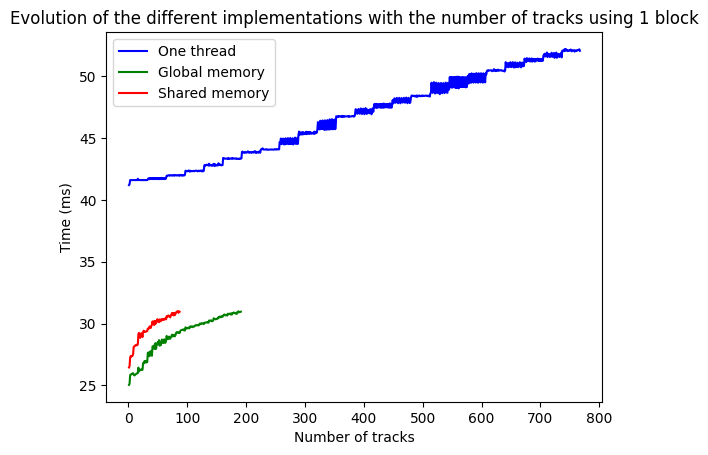

In [142]:
# Plot the data
import matplotlib.pyplot as plt
import numpy as np

plt.plot(data['One thread'].keys(), data['One thread'].values(), label='One thread', color='blue')

plt.plot(data['Global memory'].keys(), data['Global memory'].values(), label='Global memory', color='green')

plt.plot(data['Shared memory'].keys(), data['Shared memory'].values(), label='Shared memory', color='red')

# Add a second axis for the speedup
# ax2 = plt.twinx()
# ax2.plot(data['Global memory'].keys(), global_speedup.values(), label='Global memory speedup', color='green', linestyle='--')
# ax2.plot(data['Shared memory'].keys(), shared_speedup.values(), label='Shared memory speedup', color='red', linestyle='--')

# Show the label outside the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
plt.xlabel('Number of tracks')
plt.ylabel('Time (ms)')
plt.title('Evolution of the different implementations with the number of tracks using 1 block')
plt.show()


In [143]:
multi_block_data = {
    'One thread': {},
    'Global memory': {},
    'Shared memory': {},
}

with open('output2.txt', 'r') as f:
    for line in f:
        # Example: info: With x states (time in ms):    One thread=y1      Global memory=y2   Shared memory=y3
        # x is the number of states
        # y1 is the time in ms for the one thread implementation
        # y2 is the time in ms for the global memory implementation
        # y3 is the time in ms for the shared memory implementation
        if line.startswith('info: With'):
            match = re.search(r'info: With (\d+) states \(time in ms\): +One thread=(\d+|\d+\.\d+) +Global memory=(\d+|\d+\.\d+) +Shared memory=(\d+|\d+\.\d+)', line)
            if match:
                multi_block_data['One thread'][int(match.group(1))] = float(match.group(2))
                multi_block_data['Global memory'][int(match.group(1))] = float(match.group(3))
                multi_block_data['Shared memory'][int(match.group(1))] = float(match.group(4))
            else:
                print('Error parsing line: {}'.format(line))
            
print(multi_block_data)

{'One thread': {100: 42.3107, 200: 43.818, 300: 45.4932, 400: 47.3027, 500: 48.4383, 600: 50.2518, 700: 51.5123, 800: 47.401, 900: 47.9293, 1000: 48.4065, 1100: 49.3322, 1200: 50.4484, 1300: 51.115, 1400: 51.6994, 1500: 52.1287, 1600: 48.8462, 1700: 50.2259, 1800: 50.6012, 1900: 50.9403, 2000: 51.2939, 2100: 51.555, 2200: 52.1134, 2300: 52.3384, 2400: 50.5175, 2500: 50.9148, 2600: 51.5104, 2700: 51.7926, 2800: 51.8138, 2900: 52.3365, 3000: 52.5214, 3100: 51.1384, 3200: 51.6108, 3300: 51.6445, 3400: 52.095, 3500: 52.0145, 3600: 52.3957, 3700: 52.6406, 3800: 52.6172, 3900: 51.9048, 4000: 51.8952, 4100: 52.1632, 4200: 52.1941, 4300: 52.449, 4400: 52.4324, 4500: 52.7172, 4600: 52.6722, 4700: 51.8592, 4800: 52.2836, 4900: 52.1316, 5000: 52.5437, 5100: 52.4985, 5200: 52.703, 5300: 52.7169, 5400: 52.3723, 5500: 52.2274, 5600: 52.501, 5700: 52.5248, 5800: 52.6087, 5900: 52.8517, 6000: 52.8819, 6100: 52.9755, 6200: 52.6351, 6300: 52.6833, 6400: 53.015, 6500: 52.874, 6600: 52.9601, 6700: 53.1962

In [144]:
import math

multi_block_data_block = {
    'One thread': {},
    'Global memory': {},
    'Shared memory': {},
}

multi_block_data_thread_total = {
    'One thread' : {},
    'Global memory': {},
    'Shared memory': {},
}

jump = {
    'One thread': {},
    'Global memory': {},
    'Shared memory': {},
} 

for k in multi_block_data['One thread'].keys():
    # Round up to a integer
    grid_size_one = math.ceil(k / 768)
    grid_size_global = math.ceil(k / 192)
    grid_size_shared = math.ceil(k / 88)
    warp_one = math.ceil(k / (32 * grid_size_one))
    warp_global = math.ceil((k * 4) / (32 * grid_size_global))
    warp_shared = math.ceil((k * 4) / (32 * grid_size_shared))

    if warp_one < 1 or warp_global < 1 or warp_shared < 1:
        print("Error: Warp size is less than 1")
        break

    multi_block_data_block['One thread'][k] = grid_size_one
    multi_block_data_block['Global memory'][k] = grid_size_global
    multi_block_data_block['Shared memory'][k] = grid_size_shared
    multi_block_data_thread_total['One thread'][k] = warp_one * 32 * grid_size_one
    multi_block_data_thread_total['Global memory'][k] = warp_global * 32 * grid_size_global
    multi_block_data_thread_total['Shared memory'][k] = warp_shared * 32 * grid_size_shared

    tol = 20
    step = 100
    if k > step:
        if multi_block_data['One thread'][k] - multi_block_data['One thread'][k - step] > tol:
            jump['One thread'][k] = {
                'thread': warp_one * 32 * grid_size_one,
                'block': grid_size_one,
            }
        if multi_block_data['Global memory'][k] - multi_block_data['Global memory'][k - step] > tol:
            jump['Global memory'][k] = {
                'thread': warp_global * 32 * grid_size_global,
                'block': grid_size_global,
            }
        if multi_block_data['Shared memory'][k] - multi_block_data['Shared memory'][k - step] > tol:
            jump['Shared memory'][k] = {
                'thread': warp_shared * 32 * grid_size_shared,
                'block': grid_size_shared,
            }



In [145]:
def show_graph(scale):
    # Show the graph
    fig = plt.figure(figsize=(10, 15))

    # Plot the graph for small number of tracks
    ax1 = fig.add_subplot(3, 1, 1)
    ax1.set_title('Runtime for large number of tracks')
    ax1.set_xlabel('Tracks')
    ax1.set_ylabel('Runtime (ms)')

    ax1.plot(multi_block_data['One thread'].keys(), multi_block_data['One thread'].values(), label='One thread', color='blue')
    ax1.plot(multi_block_data['Global memory'].keys(), multi_block_data['Global memory'].values(), label='Global memory', color='green')
    ax1.plot(multi_block_data['Shared memory'].keys(), multi_block_data['Shared memory'].values(), label='Shared memory', color='red')
    # add a vertical line for all jumps
    for j in jump['One thread']:
        ax1.axvline(x=j, color='blue', linestyle='dashed', linewidth=1, label='Jump at ' + str(j) + ' tracks')
        break
    for j in jump['Global memory']:
        ax1.axvline(x=j, color='green', linestyle='dashed', linewidth=1, label='Jump at ' + str(j) + ' tracks')
        break
    for j in jump['Shared memory']:
        ax1.axvline(x=j, color='red', linestyle='dashed', linewidth=1, label='Jump at ' + str(j) + ' tracks')
        break

    # Set x-axis to be log scale
    # ax1.set_yscale('log')
    ax1.legend()

    # Plot the number of blocks
    ax2 = fig.add_subplot(3, 1, 2, sharex=ax1)
    ax2.set_xlabel('Tracks')
    ax2.set_ylabel('Blocks')

    ax2.plot(multi_block_data_block['One thread'].keys(), multi_block_data_block['One thread'].values(), label='One thread', color='blue')
    ax2.plot(multi_block_data_block['Global memory'].keys(), multi_block_data_block['Global memory'].values(), label='Global memory', color='green')
    ax2.plot(multi_block_data_block['Shared memory'].keys(), multi_block_data_block['Shared memory'].values(), label='Shared memory', color='red')
    # add a vertical line for all jumps
    for j in jump['One thread']:
        ax2.axvline(x=j, color='blue', linestyle='dashed', linewidth=1)
        ax2.axhline(y=jump['One thread'][j]['block'], color='blue', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['One thread'][j]['block']) + ' blocks')
        break
    for j in jump['Global memory']:
        ax2.axvline(x=j, color='green', linestyle='dashed', linewidth=1)
        ax2.axhline(y=jump['Global memory'][j]['block'], color='green', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['Global memory'][j]['block']) + ' blocks')
        break
    for j in jump['Shared memory']:
        ax2.axvline(x=j, color='red', linestyle='dashed', linewidth=1)
        ax2.axhline(y=jump['Shared memory'][j]['block'], color='red', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['Shared memory'][j]['block']) + ' blocks')
        break
    ax2.legend()

    # Plot the total number of threads
    ax4 = fig.add_subplot(3, 1, 3, sharex=ax1)
    ax4.set_xlabel('Tracks')
    ax4.set_ylabel('Threads')

    ax4.plot(multi_block_data_thread_total['One thread'].keys(), multi_block_data_thread_total['One thread'].values(), label='One thread', color='blue')
    ax4.plot(multi_block_data_thread_total['Global memory'].keys(), multi_block_data_thread_total['Global memory'].values(), label='Global memory', color='green')
    ax4.plot(multi_block_data_thread_total['Shared memory'].keys(), multi_block_data_thread_total['Shared memory'].values(), label='Shared memory', color='red')
        # add a vertical line for all jumps
    for j in jump['One thread']:
        ax4.axvline(x=j, color='blue', linestyle='dashed', linewidth=1)
        ax4.axhline(y=jump['One thread'][j]['thread'], color='blue', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['One thread'][j]['thread']) + ' threads')
        break
    for j in jump['Global memory']:
        ax4.axvline(x=j, color='green', linestyle='dashed', linewidth=1)
        ax4.axhline(y=jump['Global memory'][j]['thread'], color='green', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['Global memory'][j]['thread']) + ' threads')
        break
    for j in jump['Shared memory']:
        ax4.axvline(x=j, color='red', linestyle='dashed', linewidth=1)
        ax4.axhline(y=jump['Shared memory'][j]['thread'], color='red', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['Shared memory'][j]['thread']) + ' threads')
        break
        
    ax4.set_xscale(scale)
    ax4.legend()

    # Show the graph
    # fig.subplots_adjust(hspace=0.5)
    plt.show()

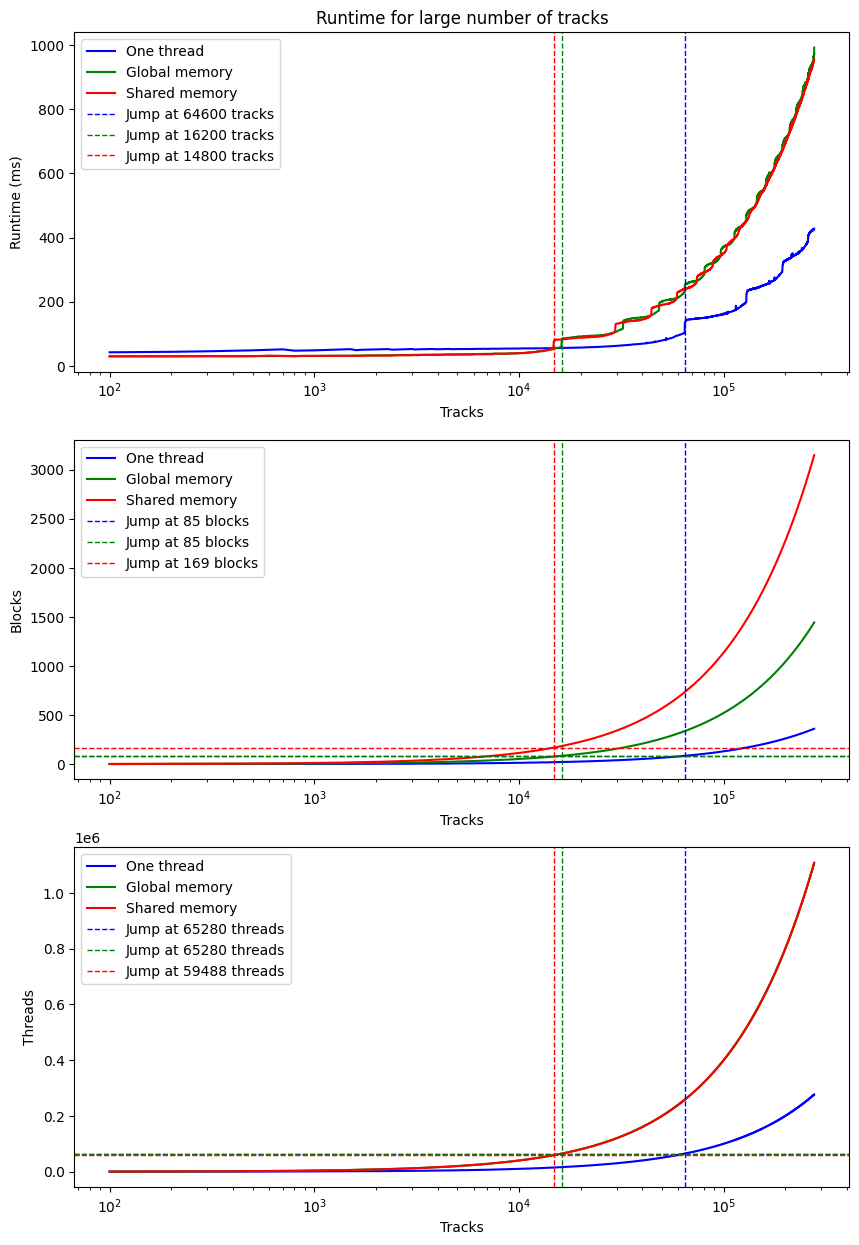

In [146]:
show_graph('log')

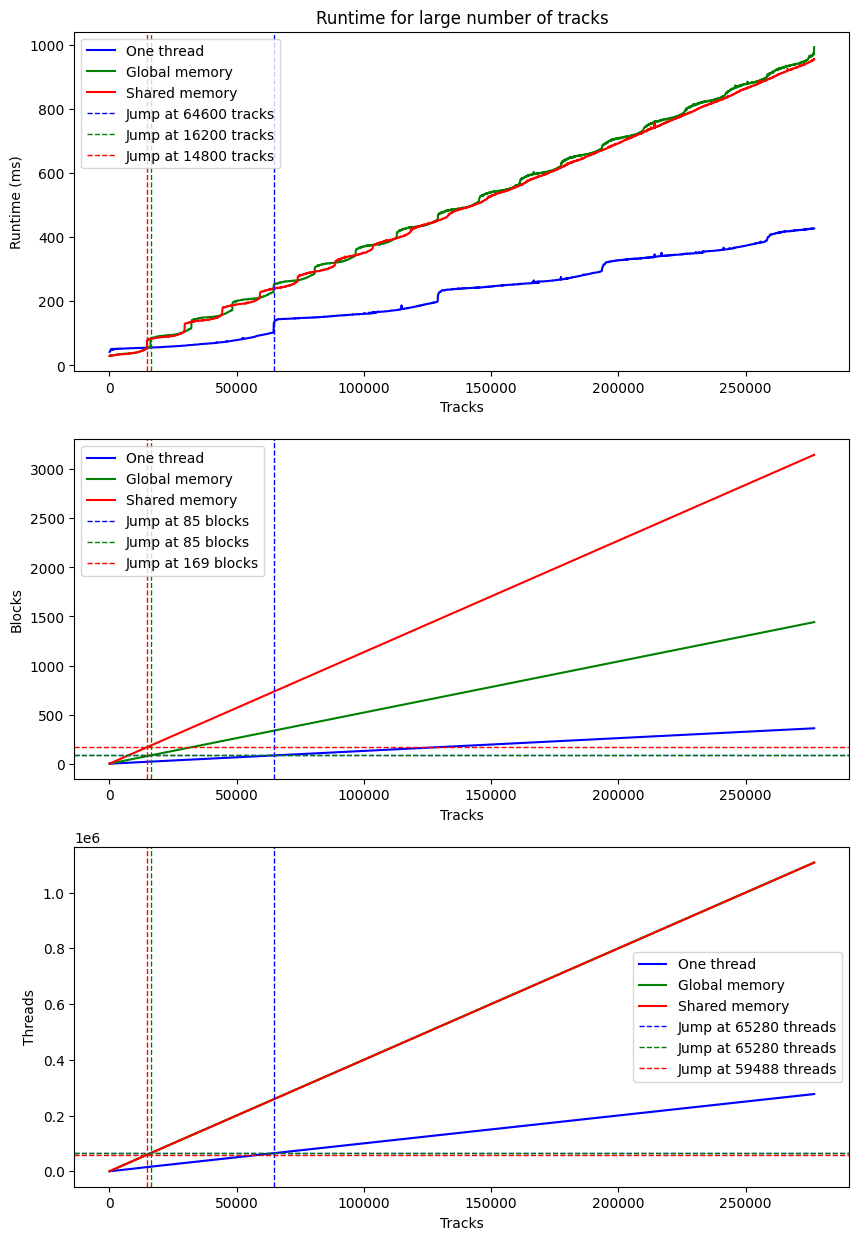

In [147]:
show_graph('linear')

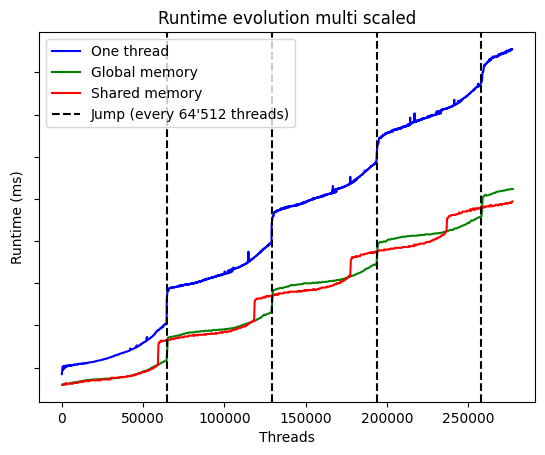

In [148]:
plt.title('Runtime evolution multi scaled')
plt.xlabel('Threads')
plt.ylabel('Runtime (ms)')

scaled_data = {
    'One thread': multi_block_data['One thread'].items(),
    'Global memory': {},
    'Shared memory': {},
    'Flags': {},
}
for key in multi_block_data['Global memory'].keys():
    if (key * 4) / 100 > len(multi_block_data['One thread'].keys()):
        break
    nb_threads = multi_block_data_thread_total['Global memory'][key]
    scaled_data['Global memory'][nb_threads] = multi_block_data['Global memory'][key]
for key in multi_block_data['Shared memory'].keys():
    if (key * 4) / 100 > len(multi_block_data['One thread'].keys()):
        break
    nb_threads = multi_block_data_thread_total['Shared memory'][key]
    scaled_data['Shared memory'][nb_threads] = multi_block_data['Shared memory'][key]
step = 64512
flag = step
flags = []
while flag <= len(multi_block_data['One thread'].keys()) * 100:
    flags.append(flag)
    flag += step

plt.plot(multi_block_data['One thread'].keys(), multi_block_data['One thread'].values(), label='One thread', color='blue')
plt.plot(scaled_data['Global memory'].keys(), scaled_data['Global memory'].values(), label='Global memory', color='green')
plt.plot(scaled_data['Shared memory'].keys(), scaled_data['Shared memory'].values(), label='Shared memory', color='red')
# Add a verticle line for every flag
for flag in flags:
    plt.axvline(x=flag, color='black', linestyle='--')

# Add a legend for the verticle lines
plt.plot([], [], label='Jump (every 64\'512 threads)', color='black', linestyle='--')

# Hide y-axis values but keep the label
plt.gca().axes.get_yaxis().set_ticklabels([])
plt.legend()
plt.show()

{'One thread': {1: 47.01814285714285, 2: 49.80756249999999, 3: 50.9892875, 4: 51.62957142857143, 5: 52.0195875, 6: 52.303512500000004, 7: 52.39092857142857, 8: 52.6179125, 9: 52.9951375, 10: 53.279771428571436, 11: 53.547575, 12: 53.708625, 13: 53.8775, 14: 54.299675, 15: 54.44612500000001, 16: 54.5914875, 17: 54.79417142857143, 18: 54.9607, 19: 55.136787500000004, 20: 55.436099999999996, 21: 55.667575, 22: 55.9720375, 23: 56.1852, 24: 56.4491625, 25: 56.6668875, 26: 56.942600000000006, 27: 57.248900000000006, 28: 57.791562500000005, 29: 58.1429875, 30: 58.41825714285714, 31: 58.737862500000006, 32: 59.1057875, 33: 59.44672857142858, 34: 59.855500000000006, 35: 60.302475, 36: 60.56185714285714, 37: 61.112962499999995, 38: 61.60325, 39: 61.906842857142856, 40: 62.53563749999999, 41: 63.202925, 42: 63.607899999999994, 43: 64.237375, 44: 64.85915, 45: 65.2822625, 46: 65.65091428571431, 47: 66.41445, 48: 67.0505, 49: 67.37615714285714, 50: 67.79298750000001, 51: 68.3982375, 52: 68.85612857

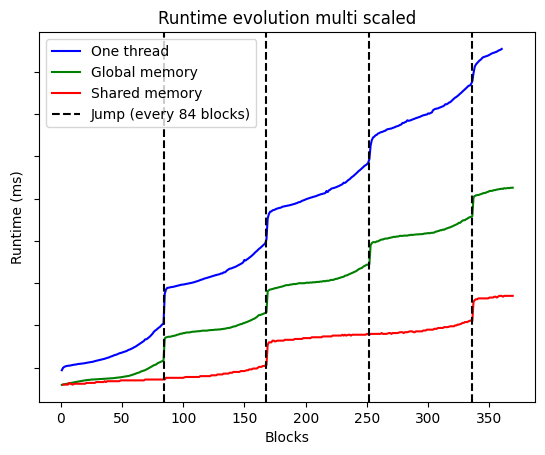

In [149]:
plt.title('Runtime evolution multi scaled')
plt.xlabel('Blocks')
plt.ylabel('Runtime (ms)')

average_time_block = {
    'One thread': {},
    'Global memory': {},
    'Shared memory': {},
}

max_threads = {
    'One thread': 769,
    'Global memory': 192,
    'Shared memory': 88,
}

max_block = 370
for key in average_time_block.keys():
    block_sum = 0
    block_count = 0
    previous_block = 1
    for k, v in multi_block_data[key].items():
        nb_block = math.ceil(k / max_threads[key])
        if max_block < nb_block:
            break
        if previous_block != nb_block:
            # print(f"{k} threads no more stand in {previous_block} blocks")
            # print(f"This block has {block_count} threads and a total time of {block_sum} ms")
            if block_count != 0:
                average_time_block[key][previous_block] = block_sum / block_count
            block_sum = v
            block_count = 1
            previous_block = nb_block
        else:
            block_sum += v
            block_count += 1

print(average_time_block)

flag_step = 84
flag = flag_step
flags = []
while flag < max_block:
    flags.append(flag)
    flag += flag_step

plt.plot(list(average_time_block['One thread'].keys()), list(average_time_block['One thread'].values()), label='One thread', color='blue')
plt.plot(list(average_time_block['Global memory'].keys()), list(average_time_block['Global memory'].values()), label='Global memory', color='green')
plt.plot(list(average_time_block['Shared memory'].keys()), list(average_time_block['Shared memory'].values()), label='Shared memory', color='red')
# Vertical lines for flags
for f in flags:
    plt.axvline(x=f, color='black', linestyle='--')
plt.plot([], [], label='Jump (every 84 blocks)', color='black', linestyle='--')

# Hide y-axis values but keep the label
plt.gca().axes.get_yaxis().set_ticklabels([])
plt.legend()
plt.show()

In [150]:
multi_block_data_fit = {
    'One thread': {},
    'Global memory': {},
    'Shared memory': {},
}

with open('output2.txt', 'r') as f:
    for line in f:
        # Example: info: With x states (time in ms):    One thread=y1      Global memory=y2   Shared memory=y3
        # x is the number of states
        # y1 is the time in ms for the one thread implementation
        # y2 is the time in ms for the global memory implementation
        # y3 is the time in ms for the shared memory implementation
        if line.startswith('info: With'):
            match = re.search(r'info: With (\d+) states \(time in ms\): +One thread=(\d+|\d+\.\d+) +Global memory=(\d+|\d+\.\d+) +Shared memory=(\d+|\d+\.\d+)', line)
            if match:
                multi_block_data_fit['One thread'][int(match.group(1))] = float(match.group(2))
                multi_block_data_fit['Global memory'][int(match.group(1))] = float(match.group(3))
                multi_block_data_fit['Shared memory'][int(match.group(1))] = float(match.group(4))
            else:
                print('Error parsing line: {}'.format(line))
            
print(multi_block_data_fit)

{'One thread': {100: 42.3107, 200: 43.818, 300: 45.4932, 400: 47.3027, 500: 48.4383, 600: 50.2518, 700: 51.5123, 800: 47.401, 900: 47.9293, 1000: 48.4065, 1100: 49.3322, 1200: 50.4484, 1300: 51.115, 1400: 51.6994, 1500: 52.1287, 1600: 48.8462, 1700: 50.2259, 1800: 50.6012, 1900: 50.9403, 2000: 51.2939, 2100: 51.555, 2200: 52.1134, 2300: 52.3384, 2400: 50.5175, 2500: 50.9148, 2600: 51.5104, 2700: 51.7926, 2800: 51.8138, 2900: 52.3365, 3000: 52.5214, 3100: 51.1384, 3200: 51.6108, 3300: 51.6445, 3400: 52.095, 3500: 52.0145, 3600: 52.3957, 3700: 52.6406, 3800: 52.6172, 3900: 51.9048, 4000: 51.8952, 4100: 52.1632, 4200: 52.1941, 4300: 52.449, 4400: 52.4324, 4500: 52.7172, 4600: 52.6722, 4700: 51.8592, 4800: 52.2836, 4900: 52.1316, 5000: 52.5437, 5100: 52.4985, 5200: 52.703, 5300: 52.7169, 5400: 52.3723, 5500: 52.2274, 5600: 52.501, 5700: 52.5248, 5800: 52.6087, 5900: 52.8517, 6000: 52.8819, 6100: 52.9755, 6200: 52.6351, 6300: 52.6833, 6400: 53.015, 6500: 52.874, 6600: 52.9601, 6700: 53.1962

In [151]:
import math

multi_block_data_fit_block = {
    'One thread': {},
    'Global memory': {},
    'Shared memory': {},
}

multi_block_data_fit_thread_total = {
    'One thread' : {},
    'Global memory': {},
    'Shared memory': {},
}

jump = {
    'One thread': {},
    'Global memory': {},
    'Shared memory': {},
} 

for k in multi_block_data_fit['One thread'].keys():
    # Round up to a integer
    grid_size_one = math.ceil(k / 768)
    grid_size_global = math.ceil(k / 192)
    grid_size_shared = math.ceil(k / 88)
    warp_one = math.ceil(k / (32 * grid_size_one))
    warp_global = math.ceil((k * 4) / (32 * grid_size_global))
    warp_shared = math.ceil((k * 4) / (32 * grid_size_shared))

    if warp_one < 1 or warp_global < 1 or warp_shared < 1:
        print("Error: Warp size is less than 1")
        break

    multi_block_data_fit_block['One thread'][k] = grid_size_one
    multi_block_data_fit_block['Global memory'][k] = grid_size_global
    multi_block_data_fit_block['Shared memory'][k] = grid_size_shared
    multi_block_data_fit_thread_total['One thread'][k] = warp_one * 32 * grid_size_one
    multi_block_data_fit_thread_total['Global memory'][k] = warp_global * 32 * grid_size_global
    multi_block_data_fit_thread_total['Shared memory'][k] = warp_shared * 32 * grid_size_shared

    tol = 20
    step = 100
    if k > step:
        if multi_block_data_fit['One thread'][k] - multi_block_data_fit['One thread'][k - step] > tol:
            jump['One thread'][k] = {
                'thread': warp_one * 32 * grid_size_one,
                'block': grid_size_one,
            }
        if multi_block_data_fit['Global memory'][k] - multi_block_data_fit['Global memory'][k - step] > tol:
            jump['Global memory'][k] = {
                'thread': warp_global * 32 * grid_size_global,
                'block': grid_size_global,
            }
        if multi_block_data_fit['Shared memory'][k] - multi_block_data_fit['Shared memory'][k - step] > tol:
            jump['Shared memory'][k] = {
                'thread': warp_shared * 32 * grid_size_shared,
                'block': grid_size_shared,
            }



In [152]:
def show_graph_fit(scale):
    # Show the graph
    fig = plt.figure(figsize=(10, 15))

    # Plot the graph for small number of tracks
    ax1 = fig.add_subplot(3, 1, 1)
    ax1.set_title('Runtime for large number of tracks')
    ax1.set_xlabel('Tracks')
    ax1.set_ylabel('Runtime (ms)')

    ax1.plot(multi_block_data_fit['One thread'].keys(), multi_block_data_fit['One thread'].values(), label='One thread', color='blue')
    ax1.plot(multi_block_data_fit['Global memory'].keys(), multi_block_data_fit['Global memory'].values(), label='Global memory', color='green')
    ax1.plot(multi_block_data_fit['Shared memory'].keys(), multi_block_data_fit['Shared memory'].values(), label='Shared memory', color='red')
    # add a vertical line for all jumps
    for j in jump['One thread']:
        ax1.axvline(x=j, color='blue', linestyle='dashed', linewidth=1, label='Jump at ' + str(j) + ' tracks')
        break
    for j in jump['Global memory']:
        ax1.axvline(x=j, color='green', linestyle='dashed', linewidth=1, label='Jump at ' + str(j) + ' tracks')
        break
    for j in jump['Shared memory']:
        ax1.axvline(x=j, color='red', linestyle='dashed', linewidth=1, label='Jump at ' + str(j) + ' tracks')
        break

    # Set x-axis to be log scale
    # ax1.set_yscale('log')
    ax1.legend()

    # Plot the number of blocks
    ax2 = fig.add_subplot(3, 1, 2, sharex=ax1)
    ax2.set_xlabel('Tracks')
    ax2.set_ylabel('Blocks')

    ax2.plot(multi_block_data_fit_block['One thread'].keys(), multi_block_data_fit_block['One thread'].values(), label='One thread', color='blue')
    ax2.plot(multi_block_data_fit_block['Global memory'].keys(), multi_block_data_fit_block['Global memory'].values(), label='Global memory', color='green')
    ax2.plot(multi_block_data_fit_block['Shared memory'].keys(), multi_block_data_fit_block['Shared memory'].values(), label='Shared memory', color='red')
    # add a vertical line for all jumps
    for j in jump['One thread']:
        ax2.axvline(x=j, color='blue', linestyle='dashed', linewidth=1)
        ax2.axhline(y=jump['One thread'][j]['block'], color='blue', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['One thread'][j]['block']) + ' blocks')
        break
    for j in jump['Global memory']:
        ax2.axvline(x=j, color='green', linestyle='dashed', linewidth=1)
        ax2.axhline(y=jump['Global memory'][j]['block'], color='green', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['Global memory'][j]['block']) + ' blocks')
        break
    for j in jump['Shared memory']:
        ax2.axvline(x=j, color='red', linestyle='dashed', linewidth=1)
        ax2.axhline(y=jump['Shared memory'][j]['block'], color='red', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['Shared memory'][j]['block']) + ' blocks')
        break
    ax2.legend()

    # Plot the total number of threads
    ax4 = fig.add_subplot(3, 1, 3, sharex=ax1)
    ax4.set_xlabel('Tracks')
    ax4.set_ylabel('Threads')

    ax4.plot(multi_block_data_fit_thread_total['One thread'].keys(), multi_block_data_fit_thread_total['One thread'].values(), label='One thread', color='blue')
    ax4.plot(multi_block_data_fit_thread_total['Global memory'].keys(), multi_block_data_fit_thread_total['Global memory'].values(), label='Global memory', color='green')
    ax4.plot(multi_block_data_fit_thread_total['Shared memory'].keys(), multi_block_data_fit_thread_total['Shared memory'].values(), label='Shared memory', color='red')
        # add a vertical line for all jumps
    for j in jump['One thread']:
        ax4.axvline(x=j, color='blue', linestyle='dashed', linewidth=1)
        ax4.axhline(y=jump['One thread'][j]['thread'], color='blue', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['One thread'][j]['thread']) + ' threads')
        break
    for j in jump['Global memory']:
        ax4.axvline(x=j, color='green', linestyle='dashed', linewidth=1)
        ax4.axhline(y=jump['Global memory'][j]['thread'], color='green', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['Global memory'][j]['thread']) + ' threads')
        break
    for j in jump['Shared memory']:
        ax4.axvline(x=j, color='red', linestyle='dashed', linewidth=1)
        ax4.axhline(y=jump['Shared memory'][j]['thread'], color='red', linestyle='dashed', linewidth=1, label='Jump at ' + str(jump['Shared memory'][j]['thread']) + ' threads')
        break
        
    ax4.set_xscale(scale)
    ax4.legend()

    # Show the graph
    # fig.subplots_adjust(hspace=0.5)
    plt.show()

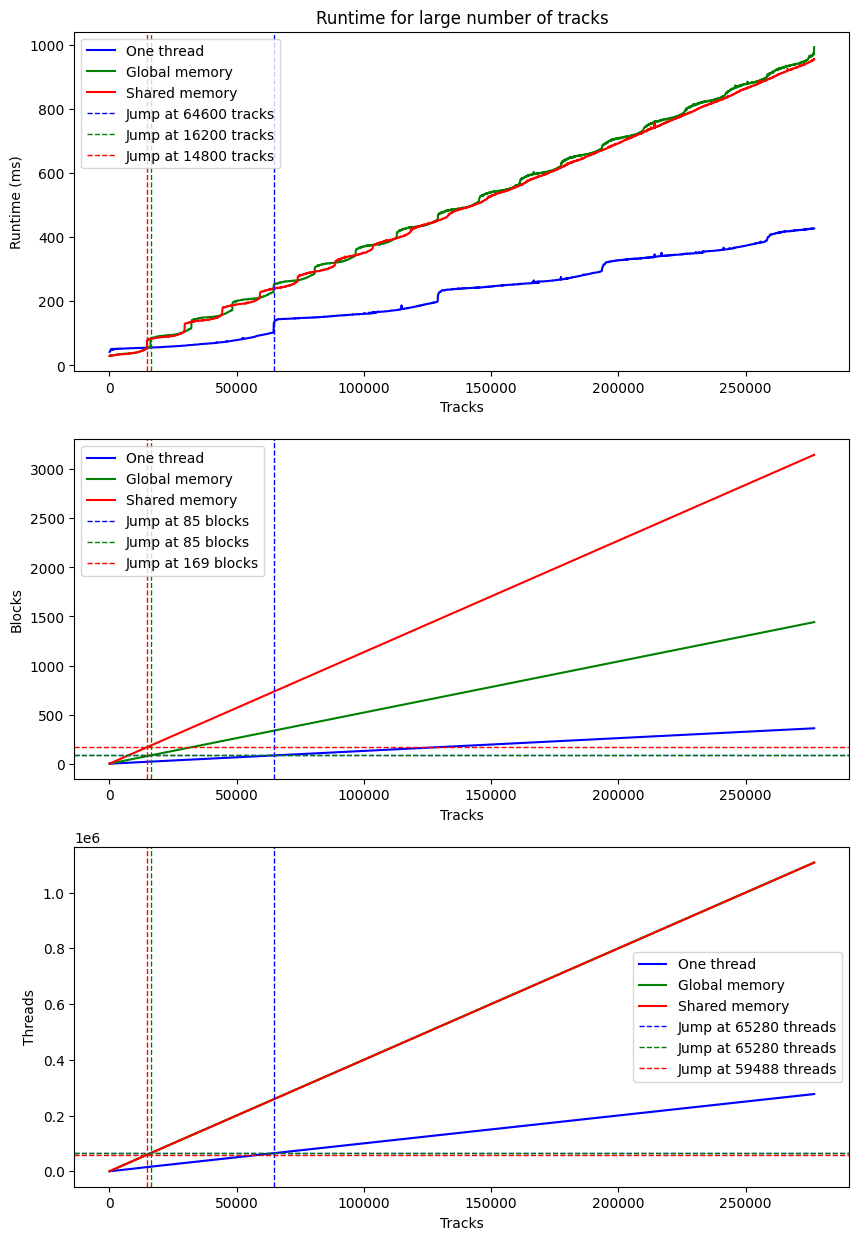

In [153]:
show_graph_fit('linear')